In [4]:
#setup
import matplotlib.pyplot as plt
from Silanizer.Grafter.grafter import Grafting
import pandas as pd

ROOT = "/gpfs/scratch/ehpc13/Fabio/PDMS"
plt.rcParams.update({"font.size": 12,"text.usetex": False,"mathtext.fontset": "stixsans"})

COLORS = {"water,K0":"xkcd:cornflower", "water,K1":"xkcd:algae green", "water,K2":"xkcd:raspberry", "water,K5":"xkcd:amber",
          "vacuum,K0":"xkcd:cornflower", "vacuum,K1":"xkcd:algae green", "vacuum,K2":"xkcd:raspberry", "vacuum,K5":"xkcd:amber",
          "toluene,K0":"xkcd:cornflower", "toluene,K1":"xkcd:algae green", "toluene,K2":"xkcd:raspberry", "toluene,K5":"xkcd:amber"}

MARKERS = {"water":"o", "vacuum":"s"}

In [6]:
NewSystem = Grafting.NewSystem(root=f"{ROOT}/start_files/")
NewSystem.build_slab(outName=f"Bare_surface.gro", atomNames=["BULK","N1B"])


Creating fcc lattice
Dimensions: 50.11793045701349 10.051313906729069 3.3573532249127416
a:0.7460784944250537, d1:0.5275571627054052, d2:0.2637785813527026, d3:0.45687790485132135


In [4]:
#make input file
ROOT = "/scratch/project_465000467/FABIO/PDMS"
POLY="Polydisperse"
SAMPLE = "K5"
DEN = 0.2
SOLV = "vacuum"
RUN = "run1"
PDI = { "K0":1.3, "K1":1.3, "K2":1.3, "K5":1.35 }
N = { "K0":15, "K1":72, "K2":88, "K5":308 }

folder = f"{ROOT}/{POLY}/{SAMPLE}/{DEN}/{RUN}/{SOLV}/min"

data = {
    "folder": folder,
    "surface_distance": 0.5,
    "grafting_density": DEN,
    "perturbation":0,
    "name": SAMPLE,
    "matrix":
    {
        "file": False,
        "size": [ 50, 10, 9 ]
    },

    "grafting method":
    {
        "to": False,
        "from": True
    },

    "chain dispersity": 
    {
        "monodisperse": False,
        "polydisperse": [ float(PDI[SAMPLE]) , int(N[SAMPLE]) ]
    },

    "atom names": {
        "polymer":[ "PDMS","DMS" ], 
        "bulk":[ "BULK","N1B" ], 
        "layer":[ "LAY","N1L" ], 
        "under_polymer":[ "PDMS","N1L1" ]
    },

    "surface geometry": 
    {
        "cylindrical": False,
        "flat": True
    }
}

import json
import subprocess

with open(f'{ROOT}/scripts_PDMS/Silanizer/input_grafter.json', 'w', encoding='utf-8') as f:
        json.dump(data, f, ensure_ascii=False, indent=4)

subprocess.run(f"mkdir -p {folder};",
               shell=True, executable="/bin/bash")
print(" ")


name: K5
folder: /scratch/project_465000467/FABIO/PDMS/Polydisperse/K5/0.3/run4/vacuum/min
surface distance: 0.6
grafting density: 0.3
matrix: ['build', [80, 80, 9]]
dispersity: ['poly', [1.35, 308]]
surface geometry: flat
atom names: {'polymer': ['PDMS', 'DMS'], 'bulk': ['BULK', 'N1B'], 'layer': ['LAY', 'N1L'], 'under_polymer': ['PDMS', 'N1L1']}
tilt molecule: 0


Creating fcc lattice
Dimensions: 80.18868873122159 79.95363334898124 3.3573532249127416
a:0.7460784944250537, d1:0.5275571627054052, d2:0.2637785813527026, d3:0.45687790485132135

Using Schultz-zimm distribution with args [1.35, 308]
Adding molecules: 100.00%   
Number of molecules: 1906  -  Number of spots: 26600  -  Max. grafting dens.: 4.186

Generating itp files


  0%|          | 0/1906 [00:00<?, ?it/s]

(<Figure size 1000x500 with 2 Axes>,
 array([<Axes: xlabel='x', ylabel='z'>, <Axes: xlabel='y', ylabel='z'>],
       dtype=object))

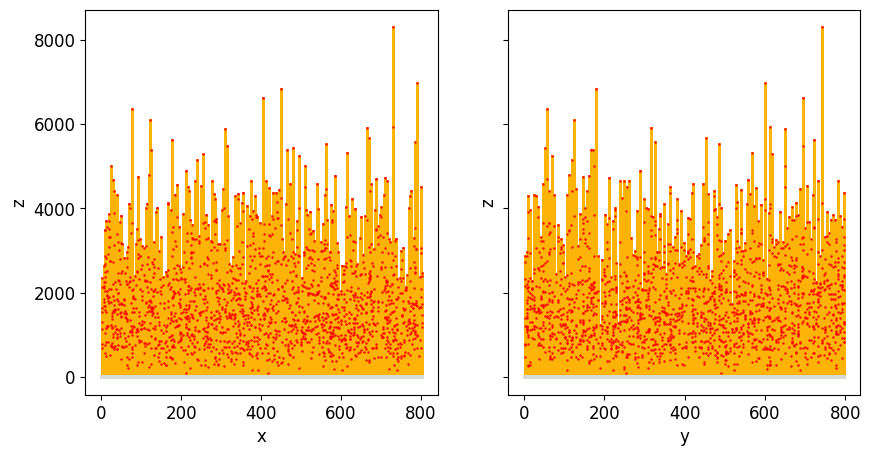

In [5]:
#build system

System = Grafting.NewSystem(root=folder)
System.read_inputs_grafter(f'{ROOT}/scripts_PDMS/Silanizer/input_grafter.json')
System.build_surface()
System.graft_matrix()
System.out_topology()
System.make_itps(System.molSizes, )
System.plot_system(colors={"END":"red","DMS":"xkcd:amber","N1L":"xkcd:light gray","N1L1":"xkcd:light gray","N1B":"xkcd:light gray"})

<Axes: xlabel='N', ylabel='Count'>

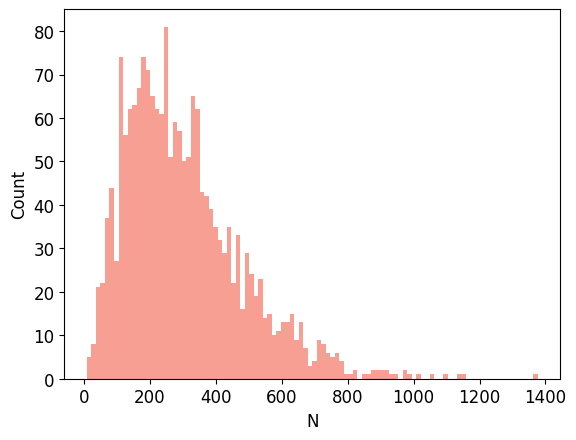

In [6]:
System.plot_mol_distribution()

In [10]:
#run minimization

jobName = folder.split("Polydisperse")[-1][1:]
print(jobName)
subprocess.run(f"cd {System.folder}; cp {ROOT}/scripts_PDMS/run_min* .; cp {ROOT}/start_files/itps/* itps/.;"+
                f"source /scratch/project_465000467/FABIO/modules.sh;"+
                f"printf 'a N1L1\na DMS\nq\n' | gmx make_ndx -f initial_config.gro -o index.ndx &> /dev/null;"+
                f"gmx grompp -p topol.top -c initial_config.gro -f run_min.mdp -o minimized.tpr -n index.ndx -maxwarn 2;"+
                f"sbatch --job-name=\"{jobName}\" run_min.sh minimized;",
                shell=True, executable="/bin/bash")

K5/0.3/run4/vacuum/min



Lmod is automatically replacing "cpeGNU/22.08" with "PrgEnv-gnu/8.3.3".

               :-) GROMACS - gmx grompp, 2021.4-plumed-2.7.4 (-:

                            GROMACS is written by:
     Andrey Alekseenko              Emile Apol              Rossen Apostolov     
         Paul Bauer           Herman J.C. Berendsen           Par Bjelkmar       
       Christian Blau           Viacheslav Bolnykh             Kevin Boyd        
     Aldert van Buuren           Rudi van Drunen             Anton Feenstra      
    Gilles Gouaillardet             Alan Gray               Gerrit Groenhof      
       Anca Hamuraru            Vincent Hindriksen          M. Eric Irrgang      
      Aleksei Iupinov           Christoph Junghans             Joe Jordan        
    Dimitrios Karkoulis            Peter Kasson                Jiri Kraus        
      Carsten Kutzner              Per Larsson              Justin A. Lemkul     
       Viveca Lindahl            Magnus Lundborg             Erik Markl

Setting the LD random seed to 1593568373

Generated 5100 of the 361675 non-bonded parameter combinations

Excluding 1 bonded neighbours molecule type 'PDMS130'

Excluding 1 bonded neighbours molecule type 'PDMS165'

Excluding 1 bonded neighbours molecule type 'PDMS335'

Excluding 1 bonded neighbours molecule type 'PDMS119'

Excluding 1 bonded neighbours molecule type 'PDMS89'

Excluding 1 bonded neighbours molecule type 'PDMS73'

Excluding 1 bonded neighbours molecule type 'PDMS167'

Excluding 1 bonded neighbours molecule type 'PDMS286'

Excluding 1 bonded neighbours molecule type 'PDMS509'

Excluding 1 bonded neighbours molecule type 'PDMS239'

Excluding 1 bonded neighbours molecule type 'PDMS348'

Excluding 1 bonded neighbours molecule type 'PDMS439'

Excluding 1 bonded neighbours molecule type 'PDMS93'

Excluding 1 bonded neighbours molecule type 'PDMS495'

Excluding 1 bonded neighbours molecule type 'PDMS379'

Excluding 1 bonded neighbours molecule type 'PDMS306'

Excluding 1 bonde

Number of degrees of freedom in T-Coupling group System is 1732941.00

NOTE 3 [file run_min.mdp]:
  This run will generate roughly 10215 Mb of data


There were 3 notes

GROMACS reminds you: "And It Goes a Little Something Like This" (Tag Team)



rs molecule type 'PDMS776'

Excluding 1 bonded neighbours molecule type 'PDMS508'

Excluding 1 bonded neighbours molecule type 'PDMS196'

Excluding 1 bonded neighbours molecule type 'PDMS229'

Excluding 1 bonded neighbours molecule type 'PDMS367'

Excluding 1 bonded neighbours molecule type 'PDMS259'

Excluding 1 bonded neighbours molecule type 'PDMS246'

Excluding 1 bonded neighbours molecule type 'PDMS398'

Excluding 1 bonded neighbours molecule type 'PDMS184'

Excluding 1 bonded neighbours molecule type 'PDMS70'

Excluding 1 bonded neighbours molecule type 'PDMS587'

Excluding 1 bonded neighbours molecule type 'PDMS633'

Excluding 1 bonded neighbours molecule type 'PDMS88'

Excluding 1 bonded neighbours molecule type 'PDMS91'

Excluding 1 bonded neighbours molecule type 'PDMS355'

Excluding 1 bonded neighbours molecule type 'PDMS242'

Excluding 1 bonded neighbours molecule type 'PDMS177'

Excluding 1 bonded neighbours molecule type 'PDMS230'

Excluding 1 bonded neighbours molecule t

CompletedProcess(args='cd /scratch/project_465000467/FABIO/PDMS/Polydisperse/K5/0.3/run4/vacuum/min; cp /scratch/project_465000467/FABIO/PDMS/scripts_PDMS/run_min* .; cp /scratch/project_465000467/FABIO/PDMS/start_files/itps/* itps/.;source /scratch/project_465000467/FABIO/modules.sh;printf \'a N1L1\na DMS\nq\n\' | gmx make_ndx -f initial_config.gro -o index.ndx &> /dev/null;gmx grompp -p topol.top -c initial_config.gro -f run_min.mdp -o minimized.tpr -n index.ndx -maxwarn 2;sbatch --job-name="K5/0.3/run4/vacuum/min" run_min.sh minimized;', returncode=0)